In [2]:
import pandas as pd

import matplotlib.pyplot as plt

## for correlation matrices
import seaborn as sns
%matplotlib inline

## for linear models
import statsmodels.api as sm

In [3]:
## read the dataset mpg exercise.xls as df
## note that this is an xls file
df = pd.read_excel('mpg excercise.xls')
df.head()

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank
0,31,5,177,102,68,37,26.5,11,2705,140,13.2
1,25,5,195,115,71,38,30.0,15,3560,200,18.0
2,26,5,180,102,67,37,28.0,14,3375,172,16.9
3,26,6,193,106,70,37,31.0,17,3405,172,21.1
4,30,4,186,109,69,39,27.0,13,3640,208,21.1


In [4]:
# Define the problem
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space',
          'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']

In [5]:
# Some brief preprocessing
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    ## This is called standard scaling 
    ## Here we don't have to do this but still it is a good practice
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,MPG_Highway,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank
0,31,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458
1,25,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238
2,26,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808
3,26,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541
4,30,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541


In [5]:
## Fit a simple linear regression 
## Use X ~ Passengers and Y~MPG_Highway

In [1]:
# %load -r 1-6 answers.py


It loooks like the predictor 'Passengers' explained 0.218 percent of the variance in the response variable
'MPG_Highway'. As we see the coefficient's p_value is very small, that means we have strong evidence that 
the relationship between 'Passengers' and 'MPG_'Highway' is not coincidence.

Now let's use the other variables to improve the model.

In [15]:
## Now use all the variables to fit a multiple linear regression model

In [2]:
# %load -r 10-20 answers.py


Note that the $R^{2}$ and $R^{2}_{adj}$ increased significantly but at the same time some predictors p_values are not significant anymore.

W can easily convert it to an adjusted $R^{2}$ by using the formula:

$$ \bar{R}^{2} = 1 - (1- R^{2})\frac{n-1}{n-p-1}$$

where $p$ is the total number of features used to train model.

[Wikipedia-$R^{2}$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

In [6]:
## Now focus on the columns with significant p_values

cols_subset = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']

## Let's fit another model with only these columns
## compare the results

In [3]:
# %load -r 24-30 answers.py


Again the last model with only four variables worked almost as good as the previous one which had  11 predictors ($R_{adj} = 0.715$ vs $R_{adj} = 0.713$). For more on this read p74 of ISLR.

### Multicollinearity

As we discussed before the multicollinearity is a problem for interprettability and confidence intervels. Now we will see how to detect multicolinearity and how to solve this problem.

[Statistics by Jim - Multicollinearity in linear regression](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)


[Wikipedia VIF - Calculation and Analysis](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [1]:
## One way of detecting multicollinearity is Variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
refined_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
X = df[refined_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(refined_cols, vif))

[('Passengers', 1.972330344357365),
 ('Wheelbase', 5.743165022553869),
 ('Weight', 9.016035842933373),
 ('Fueltank', 5.032060527995974)]

In [7]:
from pandas.plotting import scatter_matrix
import seaborn as sns
# scatter_matrix(df[['Fueltank', 'Weight', 'Wheelbase', 'MPG_Highway']]);

sns.pairplot(df[refined_cols]);

NameError: name 'refined_cols' is not defined

In [16]:
## Check the above link from wikipedia
## and try to figure out what the vif score corresponds to. 

## Let's try to show very quickly that our
## interpretation is correct
## We will focus on vif score for 
## Passenger variable only.

In [32]:
# %load -r 35-50 answers.py

In the literature, you might see that it is suggested that if VIF> 10 then this column can  be dropped. Some other resources say if VIF > 5 it is ok to drop a column. Note that these corresponds to $R^{2} = 0.90$ and $R^{2} = 0.80$ respectively. In this case, we can consider to drop 'weight' feature as its VIF >5. Let's see how this effects the model.

In [8]:
X = df[['Passengers', 'Wheelbase', 'Fueltank']]
X = sm.add_constant(X.values)

model = sm.OLS(y, X, hasconst= True)

res = model.fit()

res.summary()

NameError: name 'y' is not defined

After we dropped the 'weight' the score ($R_{adj}$) dropped from 0.713 to 0.619.

Also we could use forward and backward selection methods.

In [9]:
## sklearn.feature_selection has a class
## called RFE for recursive feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

For more details and the documentation of RFE you can check:

[sklearn- Recursive Feature Selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

[Feature Selection in sklearn -RFE](https://scikit-learn.org/stable/modules/feature_selection.html#rfe)

[Other methods in sklearn fo](https://scikit-learn.org/stable/modules/feature_selection.html#)

In [11]:
selector

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=0)

In [12]:
X

,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank
0,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458
1,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238
2,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808
3,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541
4,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541
...,...,...,...,...,...,...,...,...,...,...
88,1.842173,0.259937,1.620864,0.694275,-0.296901,2.072570,-0.662695,1.503818,-0.664980,1.352541
89,-0.082794,-0.219437,-0.138751,-0.628831,-1.227634,1.229399,-0.003544,-0.149015,-0.187648,0.559706
90,-1.045278,-1.657558,-1.018559,-0.893452,-0.917390,-0.625579,0.326032,-0.445677,0.652457,0.559706
91,-0.082794,0.465383,0.007884,-0.628831,-0.607145,0.554861,-0.003544,-0.149015,-0.569514,-0.263623


In [10]:
## instantiate the linear regression object
lm = LinearRegression()
## instantiate the selector object
selector = RFE(lm, n_features_to_select=3)
X = df.drop(columns= 'MPG_Highway')
y = df.MPG_Highway

## fit the model
selector.fit(X,y)

## check which columns are selected
ind = selector.get_support()
print(ind)

## Note that we got different columns
X.loc[:, ind].head()

[False False  True False False False False  True False  True]


,Wheelbase,Weight,Fueltank
0,-0.285386,-0.623674,-1.056458
1,1.620864,0.825733,0.407238
2,-0.285386,0.512118,0.071808
3,0.301153,0.562975,1.352541
4,0.741057,0.961350,1.352541


In [36]:
## let's compare the R2 scores with these predictors
lm3 = selector.estimator_

R2 = lm3.score(X.loc[:, ind],y)
print(R2)

0.7061447200343106


Sklearn library returns $R^{2}$-score and we can easily convert it to an adjusted $R^{2}$ by using the formula:

$$ \bar{R}^{2} = 1 - (1- R^{2})\frac{n-1}{n-p-1}$$

where $p$ is the total number of features used to train model.

[Wikipedia-$R^{2}$](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

In [ ]:
## We can also calculate adjusted R2 score 
## directly from R2

In [ ]:
# %load -r 54-55 answers.py

In [81]:
X.drop(columns= 'const', inplace = True)

X.head()

,Weight,Wheelbase,Fueltank
0,-0.623674,-0.285386,-1.056458
1,0.825733,1.620864,0.407238
2,0.512118,-0.285386,0.071808
3,0.562975,0.301153,1.352541
4,0.961350,0.741057,1.352541


## Normality of Errors and Residual Plots

In [22]:
X = df[['Weight', 'Wheelbase', 'Fueltank']]
y_predict = lm3.predict(X)

residuals = y - y_predict

NameError: name 'lm3' is not defined

In [23]:
plt.scatter(y_predict, residuals)
plt.plot(y_predict, [0 for i in range(len(df))])

plt.show()

NameError: name 'y_predict' is not defined

In [52]:
import scipy.stats as stats

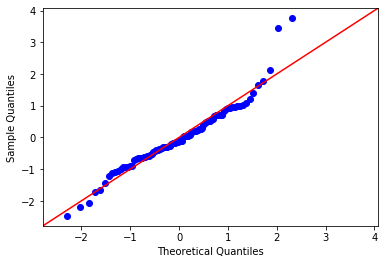

In [49]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Potential Problems in Multiple Linear Regression

In a perfect linear regression model we expect no pattern in the residual plots. In that sense, any pattern in the residual plots corresponds to a violation of assumptions.

- 1. Non-linearity of the data

U shape patter suggests that we have a non-linear relation between the predictors and the target. In thsi case adding $\log{X}$, $\sqrt{X}$ or $X^{2}$ terms to the model might be helpful.

<img src='img/non_linearity.png' width=550>

- 2. Correlation of the Error Terms 

This means the errors $\epsilon_{1}, \dots, \epsilon_{i}$ tells nothing about the error $\epsilon_{i+1}$. If we have correlation between the error terms then confidence intervals are narrower than they should be. 

- A classic example where we might get correlated errors is when we are dealing with time series data.

<img src='img/timeseries_errors.png' width=550>

- 3. Non-constant variance of the errors

Possible solutions: try $\log(Y)$ or $\sqrt{Y}$ transformations, in some cases giving weights to observations.

<img src='img/nonconstant_varience.png' width=550>

- 4. Outliers

<img src='img/outliers.png' width=550>

For more on Studentized residuals, check:

[PennState - Studentized residuals](https://newonlinecourses.science.psu.edu/stat462/node/247/)

[Statsmodel.Stats outliers_influence module documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)


In [77]:
from statsmodels import stats

import numpy as np

In [55]:
X = sm.add_constant(X)
model  = sm.OLS(y,X)
results = model.fit()


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


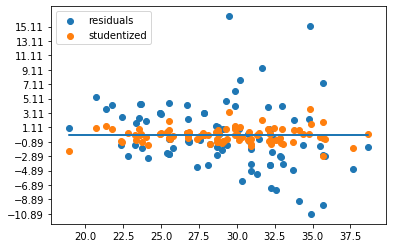

In [78]:
of = stats.outliers_influence.OLSInfluence(results)

plt.scatter(y_predict, residuals, label = 'residuals')
plt.scatter(y_predict, of.resid_studentized, label= 'studentized')
plt.plot(y_predict, [0 for i in range(len(df))])
plt.yticks(np.arange(residuals.min(), residuals.max(), 2))
plt.legend()

Typical expected values are between -3 and 3. So in that sense we can say we don't have outliers in this model.

5. High Leverage Points 

<img src='img/leverage.png' width=550>

For more details on leverage read:

    - p97 of ISLR

[Penn State Stats](https://newonlinecourses.science.psu.edu/stat462/node/171/)

[Statsmodel - Documentation](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

[A blogpost with implementation](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)


- 6. Collinearity

Which we discussed earlier.

## Further Reading

To address the collinearity in multiple linear regression we can also use methods like Principal Component Analysis(PCA) and Partial Least Squares (PLS).

[Wikipedia- Partial Least Squares ](https://en.wikipedia.org/wiki/Partial_least_squares_regression)

[Partial Least Squares](http://www.statsoft.com/Textbook/Partial-Least-Squares)

[sklearn - Partial Least Squares](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)